# Séries Temporais

## Obtenção e Análise dos dados

In [43]:
# Importação do pacotes
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

In [2]:
# Importação dos dados
alucar = pd.read_csv('D:\\Python\\Séries Temporais\\alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


Ese arquivo contém dados das vendas mensais de uma concessionária que vamos chamar de Alucar

In [3]:
# Determinação do número de colunas e linhas usando a função shape
print('Neste arquivo temos:',alucar.shape[0],'linhas e',alucar.shape[1],'colunas')

Neste arquivo temos: 24 linhas e 2 colunas


In [6]:
# Verificação de dados nulos
print(alucar.isna().sum())
print('Logo temos um total de',alucar.isna().sum().sum(),'dados nulos em todo o nosso conjunto de dados')

mes       0
vendas    0
dtype: int64
Logo temos um total de 0 dados nulos em todo o nosso conjunto de dados


In [7]:
# Verificação do tipo das variáveis
alucar.dtypes

mes       object
vendas     int64
dtype: object

Como a variável mes contém datas, vamos transformar ela em uma variável do tipo datetime.

In [8]:
# Transformação da variável mes numa variável de tipo datetime
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

Tranformação ocorreu de forma correta. Agora podemos operar a variável mes com os recursos de uma variável datetime.

In [22]:
# Verificando o intervalo de tempo dos nossos dados
print('Os dados referentes a venda são de',min(alucar['mes']).strftime('%d/%m/%Y'),'até',max(alucar['mes']).strftime('%d/%m/%Y'))

Os dados referentes a venda são de 31/01/2017 até 31/12/2018


Text(0, 0.5, 'Vendas (R$)')

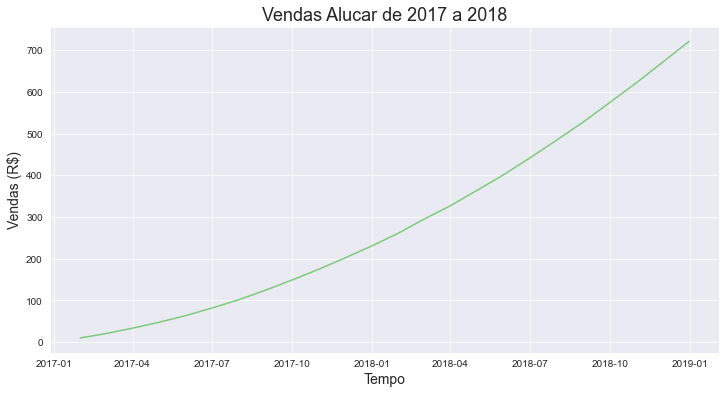

In [11]:
# Criação do gráfico das vendas mensais
sns.set_palette('Accent') # setando paleta de cor
sns.set_style('darkgrid') # setando grade de visualização
g1 = sns.lineplot(x='mes',y='vendas',data=alucar) # plotagem do gráfico e alocando o gráfico na variável g1
g1.figure.set_size_inches(12,6) # modificando o tamanho do gráfico
g1.set_title('Vendas Alucar de 2017 a 2018', loc='center', fontsize=18) # iserindo título e alterando formatação do título do gráfico
g1.set_xlabel('Tempo', fontsize=14) # inserindo label no eixo x e formatando o tamanho da fonte
g1.set_ylabel('Vendas (R$)', fontsize=14) # inserindo label no eixo y e formatando o tamanho da fonte

In [26]:
# Definição da função para plotar gráficos de linha usando seaborn
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent') # setando paletas de cor
  sns.set_style('darkgrid') # setando grade de visualização
  ax = sns.lineplot(x=x, y=y, data=dataset) # alocando o gráfico na variável ax
  ax.figure.set_size_inches(12,6) # modificando o tamanho do gráfico
  ax.set_title(titulo, loc='center', fontsize=18) # inserindo título e alterando formatação do título do gráfico
  ax.set_xlabel(labelx, fontsize=14) # inserindo label no eixo x e formatando o tamanho da fonte
  ax.set_ylabel(labely, fontsize=14) # inserindo label no eixo y e formatando o tamanho da fonte
  ax = ax

In [25]:
# Inserção da coluna aumento
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


A função diff() calcula a diferença entre os valores das colunas que foi selecionda. Note que o primeiro valor é NaN pois não existe a primeira diferença, uma vez que ele seria o resultado da diferença do primeiro valor da coluna vendas com o seu antecessor, que não existe.

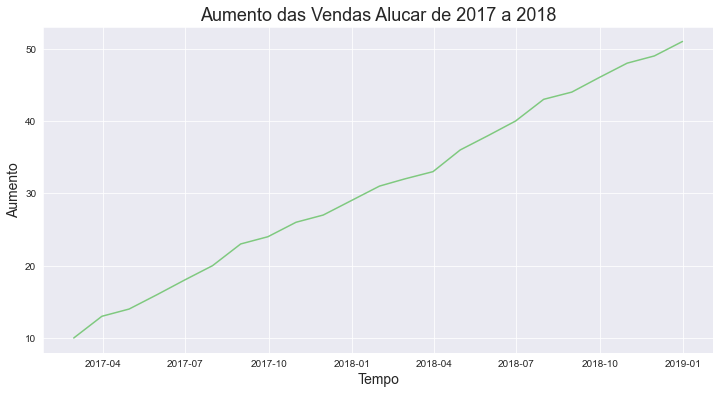

In [27]:
# Plot do gráfico referente ao aumento das vendas
plotar('Aumento das Vendas Alucar de 2017 a 2018','Tempo','Aumento','mes','aumento',alucar)

In [28]:
# Criação da coluna aceleração
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


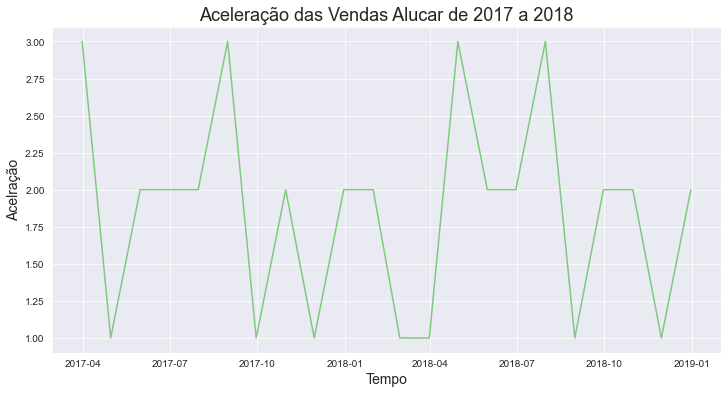

In [29]:
plotar('Aceleração das Vendas Alucar de 2017 a 2018','Tempo','Acelração','mes','aceleracao',alucar)

Para facilitar a análise dos três gráficos e trazer uma melhor interpretação, será definida uma função para plotar os três gráficos juntos.

In [41]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  pyplot.figure(figsize=(16,12))
  ax = pyplot.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18, loc='center')
  sns.lineplot(x=x, y=y1, data=dataset)
  pyplot.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  pyplot.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

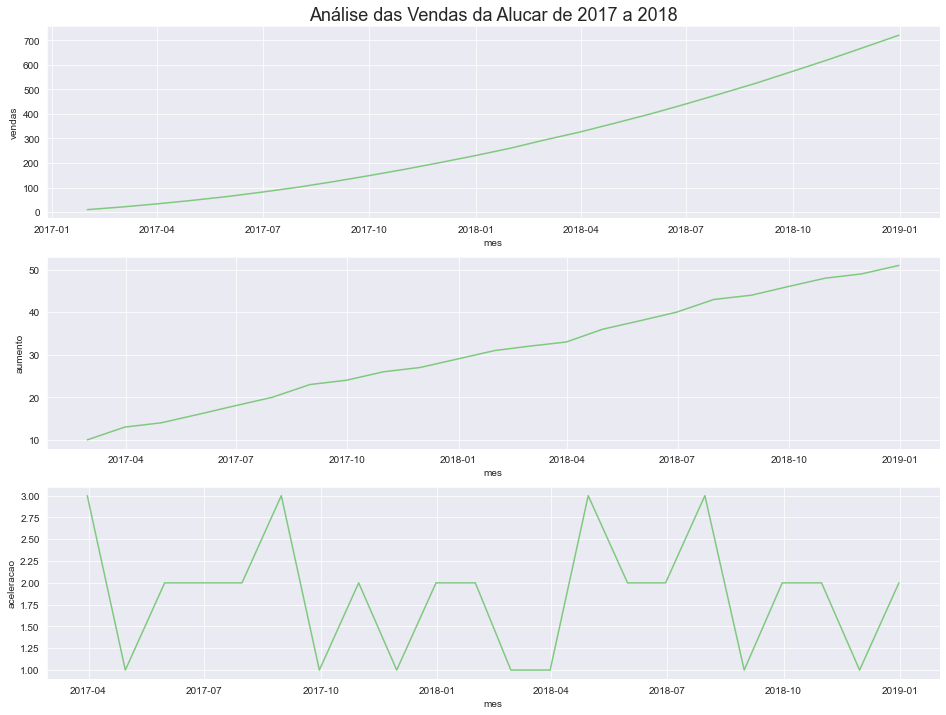

In [42]:
plot_comparacao('mes','vendas','aumento','aceleracao',alucar,'Análise das Vendas da Alucar de 2017 a 2018')

Como podemos na comparação entre venda, aumento e aceleração. As vendas aumentaram no período analisando, mostrando que existe uma forte tendência das vendas da Alucar continuarem aumentando. Contudo ela não apresentou um aumento linear, essa curva de aumento pode ser evidenciada pela variável aumento. Fica evidente que a variável auemtno também apresentou uma tendência de contuar crescendo, contudo houveram meses que o auemento das vendas relativo ao mês anterior não foi o mesmo dos aumentos relativos em outros momentos. Ou seja, há a tendência de sempre aumentar o vulome de vendas, porém não na mesma proporção.
Esse aumento não homogêneo é evidenciado no comportamento da variável aceleração, onde podemos ver que a aceleração das vendas estão sempre positivo, porém ficam oscilando entre meses de aceleração muito forte e períodos de aceleração mais branda.

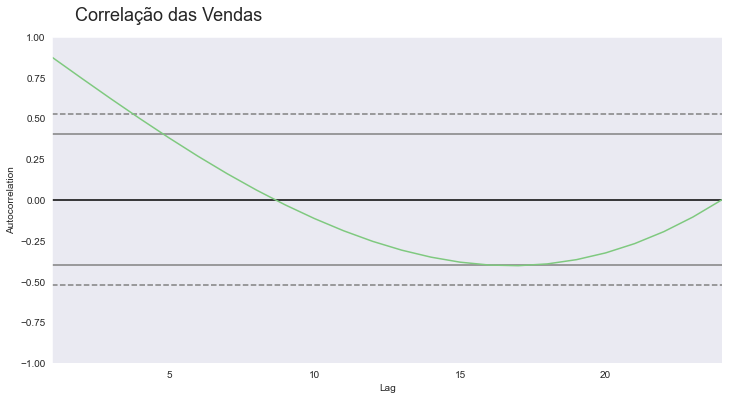

In [44]:
# Plotagem do gráfico de autocorrelação para variável Vendas
g2 = pyplot.figure(figsize=(12,6))
g2.suptitle('Correlação das Vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
g2 = g2

O gráfico de autocorrelação serve para avaliar a autocorrelação dos valores de um série de dados. No exemplo acima podemos ver que no início do gráfico existe um correlação forte, ou seja, existe uma forte correlação entre os dados. Em outras palavras a tendência é sempre aumentar ou sempre diminuir os valores.

Após, aproximadamente, 5 defasagens os valores apresentam um correlação fraca ou até correlação nula.

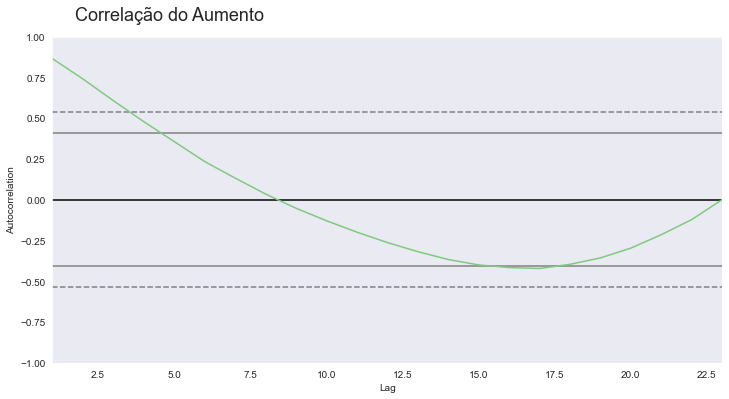

In [45]:
# Plotagem do gráfico de autocorrelação para variável Aumento
g2 = pyplot.figure(figsize=(12,6))
g2.suptitle('Correlação do Aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
g2 = g2

O aumento apresenta uma autocorrelação semelhante às vendas.

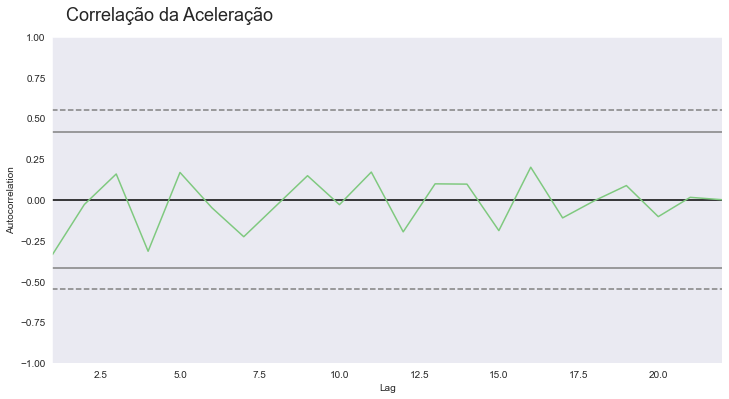

In [47]:
# Plotagem do gráfico de autocorrelação para variável Aceleração
g2 = pyplot.figure(figsize=(12,6))
g2.suptitle('Correlação da Aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
g2 = g2

Diferentemente das análises anteriores, a variável aceleração apresentou uma autocorrelação variando aleatoriamento em torno de 0. Ou seja, se trata de uma variável randomica, sem padrão definido, sem tendência.

## Alucar - Analisando Assinantes da Newsletter

In [48]:
assinantes = pd.read_csv('D:\\Python\\Séries Temporais\\newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [49]:
# Determinação do número de colunas e linhas usando a função shape
print('Neste arquivo temos:',assinantes.shape[0],'linhas e',assinantes.shape[1],'colunas')

Neste arquivo temos: 24 linhas e 2 colunas


In [50]:
# Verificação de dados nulos
print(assinantes.isna().sum())
print('Logo temos um total de',assinantes.isna().sum().sum(),'dados nulos em todo o nosso conjunto de dados')

mes           0
assinantes    0
dtype: int64
Logo temos um total de 0 dados nulos em todo o nosso conjunto de dados


In [51]:
# Transformação da variável mes numa variável de tipo datetime
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [52]:
# Criação da coluna Aumento e Aceleração
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


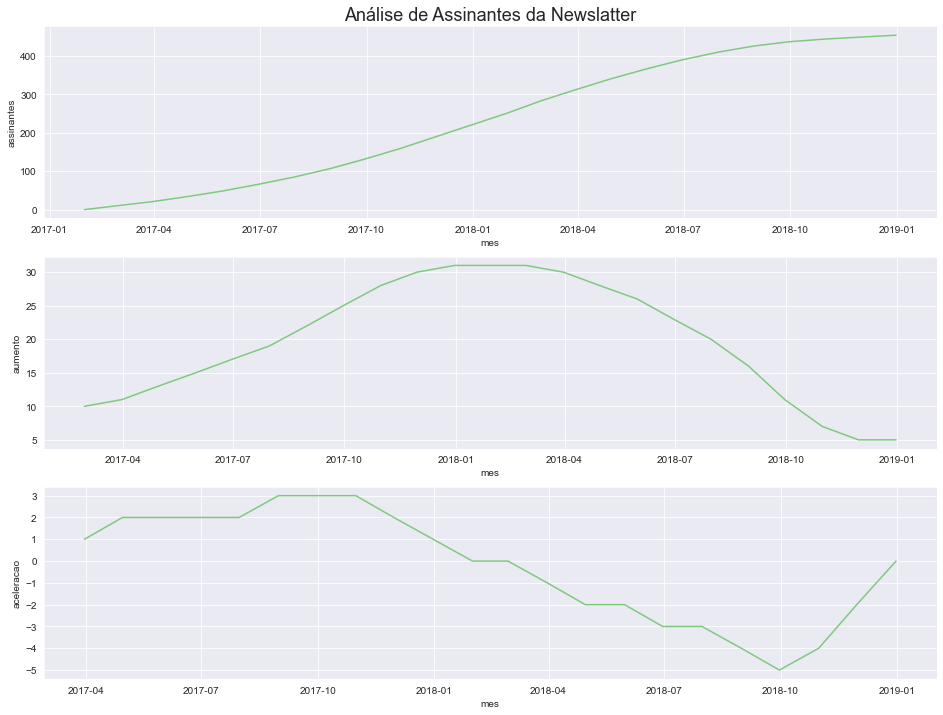

In [53]:
plot_comparacao('mes','assinantes','aumento','aceleracao',assinantes,'Análise de Assinantes da Newslatter')

Diferentemente das vendas, os assinantes da newsletter apresentaram um comportamento diferente. O gráfico dos assinantes apresentou tendência de crescimento, contudo houve uma mudança na concavidade da curva de crescimento. Isso representa uma mudança no aumento do número dos assinantes.

O gráfico do aumento do número de assiantes mostra de forma mais clara essa mudança no comportamento dos dados. Nos primeiros 6 meses do período de observação houve um crescimento do aumento do número de assianantes, oque mostra na curva de números de assinantes na forma de uma curva de aumento com concavidade positiva (concavidade "para cima"). Por outro lado, nos últimos 6 meses houve uma queda no aumento do número de assinantes. É possível ver o aumento ainda continua positivo, por isso o número de assinantes continua aumentando, contudo como o aumento está diminuindo a taxa de crescimento da curva de do número de assinantes muda, oque é mostrado na forma de uma curva de crescimento com concavidade negativa (concavidade "para baixo"). Ainda é possível observar a formação de um patamar nos períodos finais com a estabilização do aumento do número de assinantes.

A curva da aceleração mostra justamento o motivo do comportamento dos dados do aumento. quando a aceleração é positiva, o aumento do número de assinantes cresce. Quando a aceleração é negativa o aumento do número de assinantes cai e quando a aceleração é nula o aumento do número de assinantes é constante.

## Chocolura - Análise de Produção/Vendas

In [56]:
# Importação dos dados
chocolura = pd.read_csv('D:\\Python\\Séries Temporais\\chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [57]:
# Determinação do número de colunas e linhas usando a função shape
print('Neste arquivo temos:',chocolura.shape[0],'linhas e',chocolura.shape[1],'colunas')

# Verificação de dados nulos
print(chocolura.isna().sum())
print('Logo temos um total de',chocolura.isna().sum().sum(),'dados nulos em todo o nosso conjunto de dados')

# Transformação da variável mes numa variável de tipo datetime
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
print(chocolura.dtypes)

Neste arquivo temos: 24 linhas e 2 colunas
mes       0
vendas    0
dtype: int64
Logo temos um total de 0 dados nulos em todo o nosso conjunto de dados
mes       datetime64[ns]
vendas             int64
dtype: object


In [58]:
# Criação das colunas Aumento e Aceleração
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


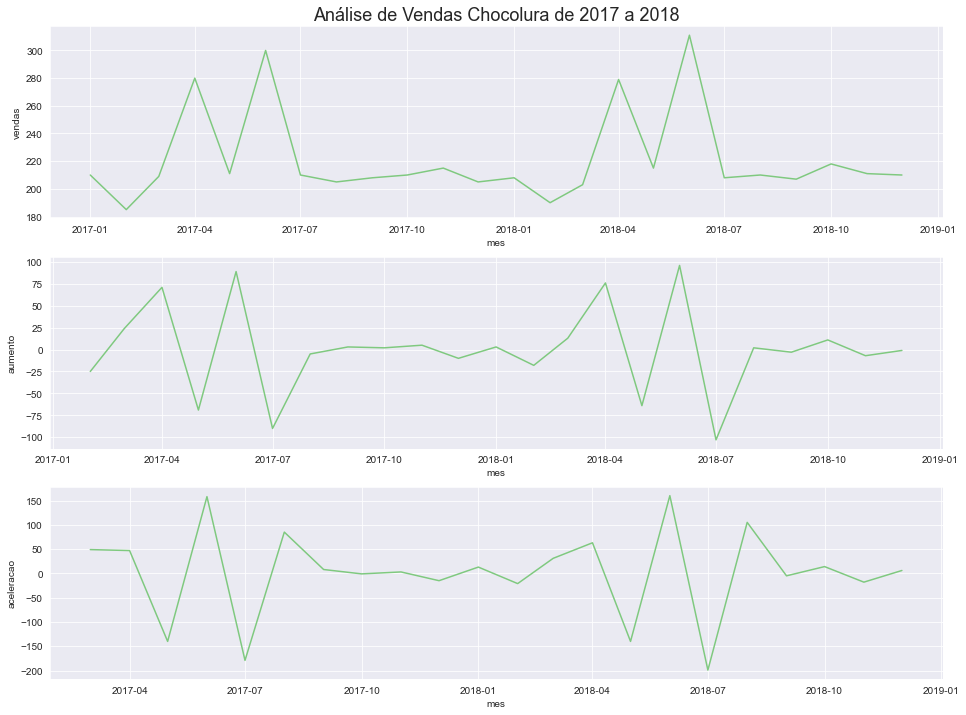

In [65]:
# Plot do gráfico comparativo
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de Vendas Chocolura de 2017 a 2018')

Em relação as vendas da Chocolura é possível observar que há a ocorrência de dois momentos bem distintos. Nos meses de Abril e Junho há a ocorrência de dois picos de venda. Esses fatos estão relacionados a duas datas bem específicas: Páscoa e dia dos Namorados. É um costume nosso consumir bastante chocolate nesses dois períodos, então a venda de chocolates apresenta esse comportamento sazonal.

Nos demais períodos do ano, basicamente há um nível constante de vendas de chocolate. Esse nível constante no número de vendas é bem evidenciado, pois os gráficos do aumento e da aceleração ficam variando em torno de 0, ou seja, não há mudanças significativas nas vendas.

Como sabemos que nos meses de Abril e junho temos fatores externos que afetam o comportamento das vendas, vamos analisar o comportamento das vendas de chocolate durante os períodos de estabilidade para saber como as vendas de chocolate se comportam diariamente e ver se existe algum padrão de comportamento em períodos de tempo menores.

## Chocolura - Vendas diárias (Outubro e Novembro)

In [60]:
# Importação dos dados
vendas_diarias = pd.read_csv('D:\\Python\\Séries Temporais\\vendas_por_dia.csv')
vendas_diarias.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [61]:
# Determinação do número de colunas e linhas usando a função shape
print('Neste arquivo temos:',vendas_diarias.shape[0],'linhas e',vendas_diarias.shape[1],'colunas')

# Verificação de dados nulos
print(vendas_diarias.isna().sum())
print('Logo temos um total de',vendas_diarias.isna().sum().sum(),'dados nulos em todo o nosso conjunto de dados')

# Transformação da variável dia numa variável de tipo datetime
vendas_diarias['dia'] = pd.to_datetime(vendas_diarias['dia'])
print(vendas_diarias.dtypes)

Neste arquivo temos: 61 linhas e 2 colunas
dia       0
vendas    0
dtype: int64
Logo temos um total de 0 dados nulos em todo o nosso conjunto de dados
dia       datetime64[ns]
vendas             int64
dtype: object


In [62]:
# Criação das colunas Aumento e Aceleração
vendas_diarias['aumento'] = vendas_diarias['vendas'].diff()
vendas_diarias['aceleracao'] = vendas_diarias['aumento'].diff()
vendas_diarias.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


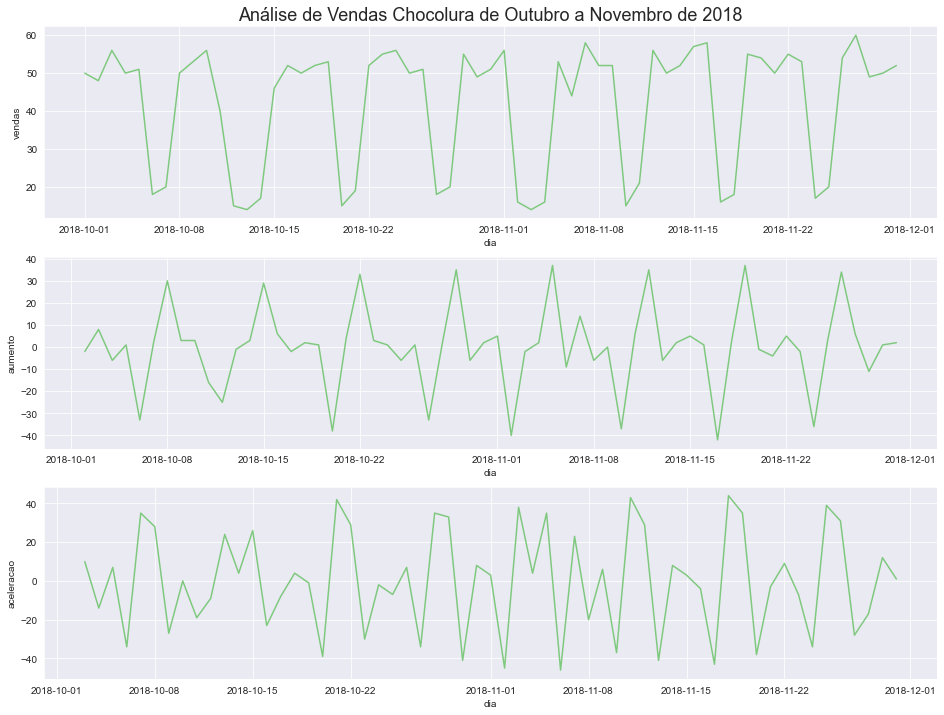

In [64]:
# Plot do gráfico comparativo
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_diarias, 'Análise de Vendas Chocolura de Outubro a Novembro de 2018')

Por uma primeira análise é possível observar que existe um comportamento bem padronizado da venda de chocolate ao longo dos dias. Algo semelhante a uma sazonalidade relativa aos dias da semana. Mais a frente vamos analisar com mais detalhes para identificar as características desse comportamento.

### Analisando a Sazonalidade

In [67]:
# Criação da coluna dia da semana - Identificar qual o dia da semana referente a cada data
vendas_diarias['dias_da_semana'] = vendas_diarias['dia'].dt.day_name()
vendas_diarias.head(10)

,dia,vendas,aumento,aceleracao,dias_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday
7,2018-10-08,50,30.0,28.0,Monday
8,2018-10-09,53,3.0,-27.0,Tuesday
9,2018-10-10,56,3.0,0.0,Wednesday


In [68]:
# Verificação dos valores únicos que existem numa coluna - Usando a função unique()
vendas_diarias['dias_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [69]:
# Tradução do nome dos dias da semana
dias_traduzidos = {'Monday':'Segunda', 'Tuesday':'Terca', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado','Sunday':'Domingo'}
vendas_diarias['dias_da_semana'] = vendas_diarias['dias_da_semana'].map(dias_traduzidos)
vendas_diarias.head(10)

,dia,vendas,aumento,aceleracao,dias_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


### Agrupando os dias

In [70]:
vendas_agrupadas = vendas_diarias.groupby('dias_da_semana')['vendas','aumento','aceleracao'].mean().round()
vendas_agrupadas

C:\Users\ioko_\AppData\Local\Temp/ipykernel_41772/2102547279.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_diarias.groupby('dias_da_semana')['vendas','aumento','aceleracao'].mean().round()


,vendas,aumento,aceleracao
dias_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


A função groupby() agrupa os valores dem um conjunto de dados de acordo com o critério que você escolher. Em nosso exemplo, foi escolhido um agrupamento referente aos dias da semana. Ou seja, foram calculas as médias de vendas, aumento e aceleração para cada dia da semana.

Sendo assim é possível observar, a primeiro momento, que as vendas são maiores em dias úteis do que em dias de final de semana.

### Correlação das vendas diárias

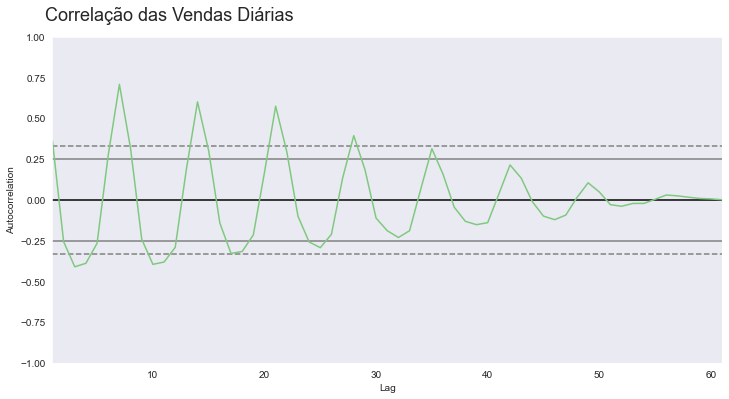

In [72]:
# Plotagem do gráfico de autocorrelação para variável Vendas
g2 = pyplot.figure(figsize=(12,6))
g2.suptitle('Correlação das Vendas Diárias', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(vendas_diarias['vendas'])
g2 = g2

Como havíamos observado, as vendas diárias apresentam sazonalidade. Essa sazonalidade é evidenciada pela aparição dos picos no gráfico.

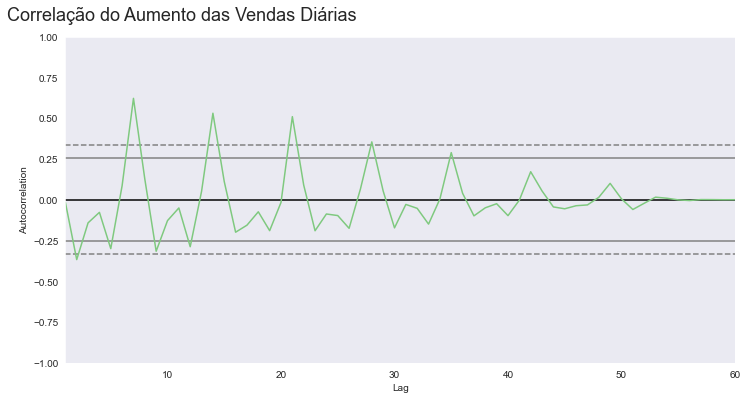

In [73]:
# Plotagem do gráfico de autocorrelação para variável Aumento
g2 = pyplot.figure(figsize=(12,6))
g2.suptitle('Correlação do Aumento das Vendas Diárias', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(vendas_diarias['aumento'][1:])
g2 = g2

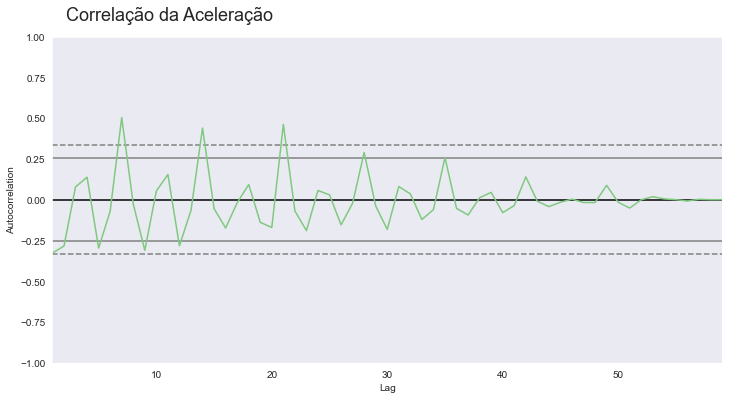

In [74]:
# Plotagem do gráfico de autocorrelação para variável Aceleração
g2 = pyplot.figure(figsize=(12,6))
g2.suptitle('Correlação da Aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(vendas_diarias['aceleracao'][2:])
g2 = g2

## Análise de Vendas - Cafelura

In [83]:
# Importação dos dados
cafelura = pd.read_csv('D:\\Python\\Séries Temporais\\cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [84]:
# Determinação do número de colunas e linhas usando a função shape
print('Neste arquivo temos:',cafelura.shape[0],'linhas e',cafelura.shape[1],'colunas')

# Verificação de dados nulos
print(cafelura.isna().sum())
print('Logo temos um total de',cafelura.isna().sum().sum(),'dados nulos em todo o nosso conjunto de dados')

# Transformação da variável dia numa variável de tipo datetime
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
print(cafelura.dtypes)

Neste arquivo temos: 24 linhas e 2 colunas
mes       0
vendas    0
dtype: int64
Logo temos um total de 0 dados nulos em todo o nosso conjunto de dados
mes       datetime64[ns]
vendas             int64
dtype: object


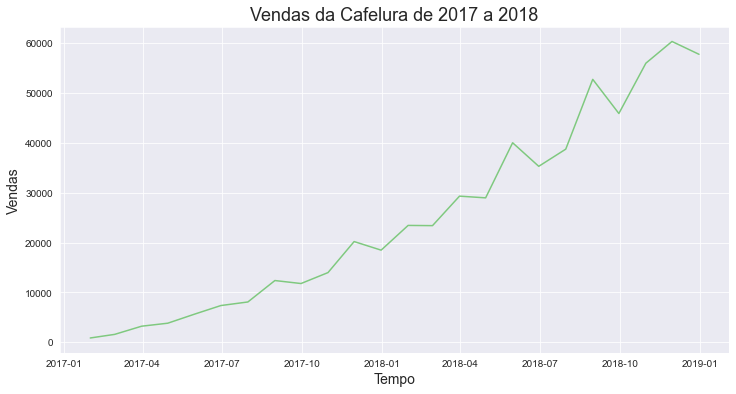

In [85]:
# Plotagem do gráfico da vendas da Cafelura
plotar('Vendas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

Como podemos ver, a curva apresentada tem um forma com picos e não uniforme. Para facilitar a leitura e interpretação dos dados vamos normalizar os dados.

In [86]:
# Importação sobre a quantidade de dias de fim de semana em cada mês do nosso períoido de estudo
quantidade_de_dias_de_fds = pd.read_csv('D:\\Python\\Séries Temporais\\dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [87]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [88]:
# Normalização dos dados
cafelura['vendas_normalizadas'] = cafelura['vendas']/quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


A normalização foi feita na quantidade de dias de fds pois fizemos a suposição que esta é uma cafeteria que abre apenas nos dias de final de semana. A variável vendas_normalizadas tem a quantidade média de vendas em cada dia de operação.

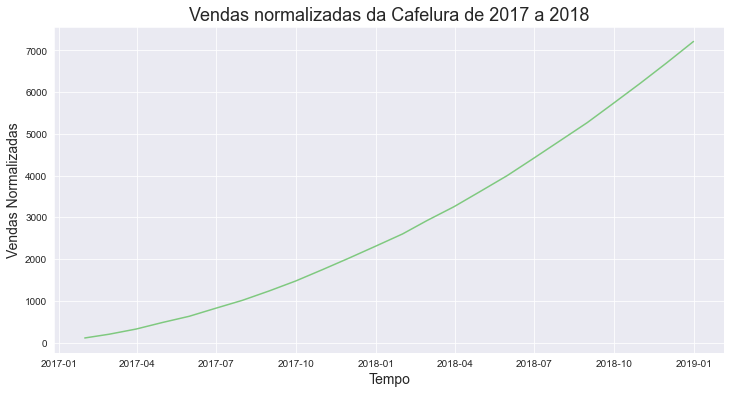

In [89]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018','Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

Assim podemos realizar uma melhor observação das vendas da Cafelura. Notamos uma tendência de aumento nas vendas e pelo formato da curva, podemos inferir que existe tendência do aumento das vendas crescerem (concavidade da curva positiva).

## Statsmodels

In [ ]:
# Importação do pacote necessário
%pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

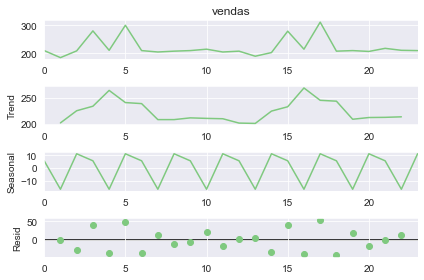

In [112]:
# Estudo de sazonalidade e plotagem do gráfico da sazonalidade
resultado = seasonal_decompose(chocolura['vendas'],period=3)
ax = resultado.plot()

In [113]:
# Obtenção dos resultados da análise
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [114]:
# Criação do Data Frame com os resultados do estudo de sazonalidade
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


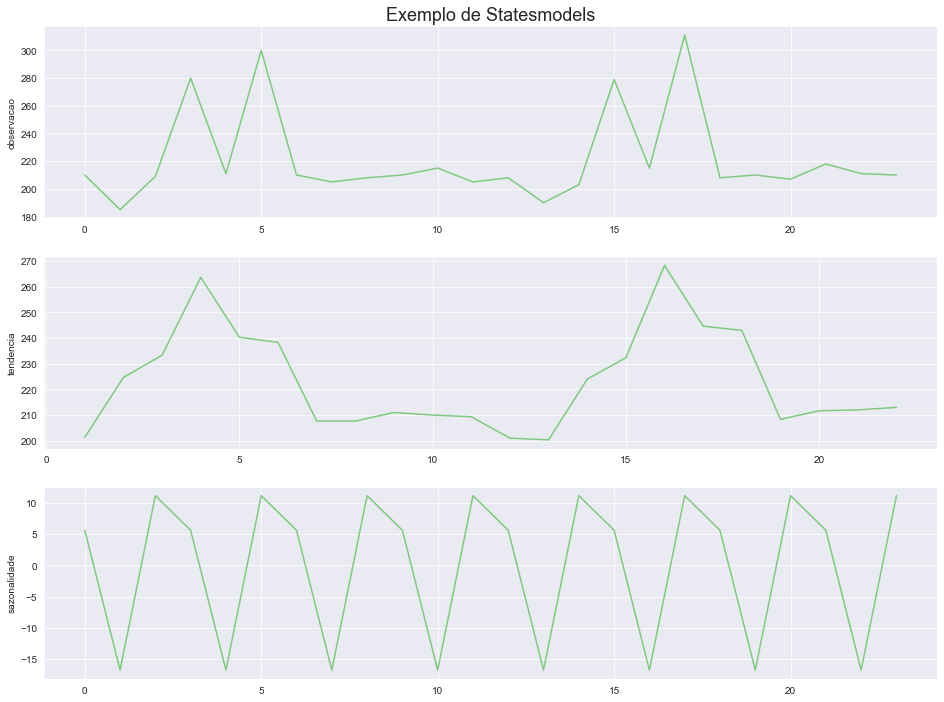

In [115]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statesmodels')

O primeiro plot é o do conjunto de dados como conhecemos, ou seja, as vendas de chocolate, como já havíamos estudado e analisado.

O segundo plot é da tendência, como vimos a venda de chocolate tem uma tendência de aumentar nos meses de Abril e Junho devido a datas comemorativas e no restante do ano se mantém um nível de vendas, aproximadamente, constante.

O terceiro plot mostra justamento a sazonalidade diária, onde temos uma venda de chocolate maior durante a semana que nos dias de final de semana.

## Análise - Alucel

In [125]:
# Importação dos dados
alucel = pd.read_csv('D:\\Python\\Séries Temporais\\alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [126]:
# Determinação do número de colunas e linhas usando a função shape
print('Neste arquivo temos:',alucel.shape[0],'linhas e',alucel.shape[1],'colunas')

# Verificação de dados nulos
print(alucel.isna().sum())
print('Logo temos um total de',alucel.isna().sum().sum(),'dados nulos em todo o nosso conjunto de dados')

# Transformação da variável dia numa variável de tipo datetime
alucel['dia'] = pd.to_datetime(alucel['dia'])
print(alucel.dtypes)

Neste arquivo temos: 61 linhas e 2 colunas
dia       0
vendas    0
dtype: int64
Logo temos um total de 0 dados nulos em todo o nosso conjunto de dados
dia       datetime64[ns]
vendas           float64
dtype: object


In [127]:
# Criação das colunas Aumento e Aceleração
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


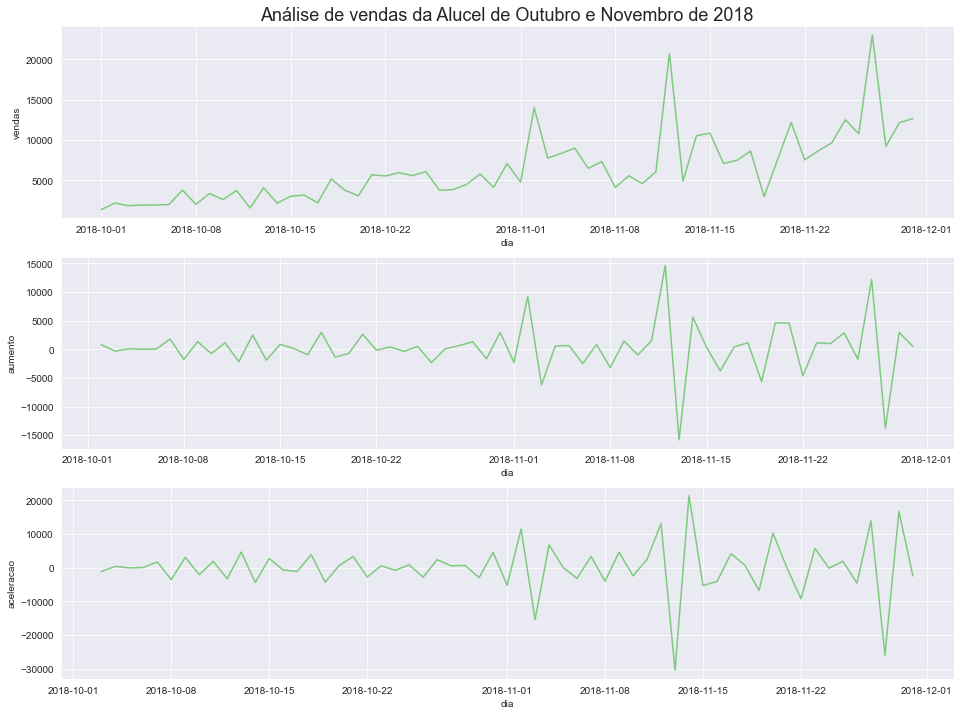

In [128]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

Como é possível observar, os dados apresentam uma dispersão que torna difícil sua análise sem um pré-processamento. Nesse caso que existe uma variação muito grande entre os valores, vamos utilizar a média móvel para melhor adequar e estudar os dados.

### Média Móvel

In [129]:
# Criação da coluna com os dados da média movel de 7 dias
alucel['media_movel_7'] = alucel['vendas'].rolling(7).mean()
alucel.head(10)

,dia,vendas,aumento,aceleracao,media_movel_7
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


No cálculo da média móvel é feita uma previsão dos valores vendidos com base na média dos x períodos anteriores. Nesse caso foram feitas as médias com os 7 períodos anteriores.

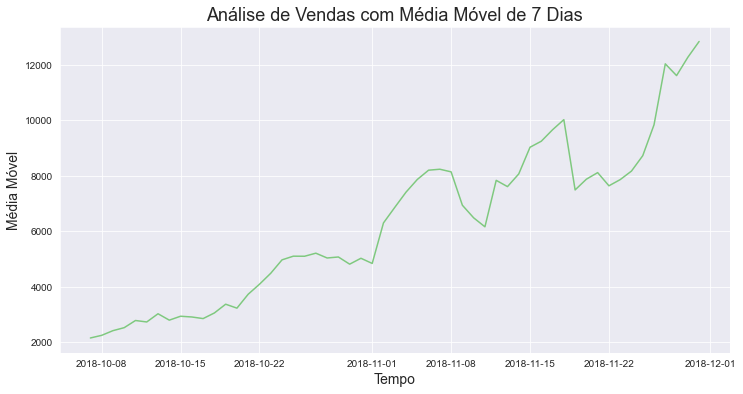

In [131]:
plotar('Análise de Vendas com Média Móvel de 7 Dias','Tempo','Média Móvel','dia','media_movel_7',alucel)

Podemos ver que os dados estão mais organizados e se torna mais simples de fazer análises. Contudo ainda é possível melhorar o modelo.

In [132]:
# Criação da coluna com os dados da média movel de 21 dias
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()
alucel.head(30)

,dia,vendas,aumento,aceleracao,media_movel_7,media_movel_21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429,NaN
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143,NaN
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857,NaN
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571,NaN


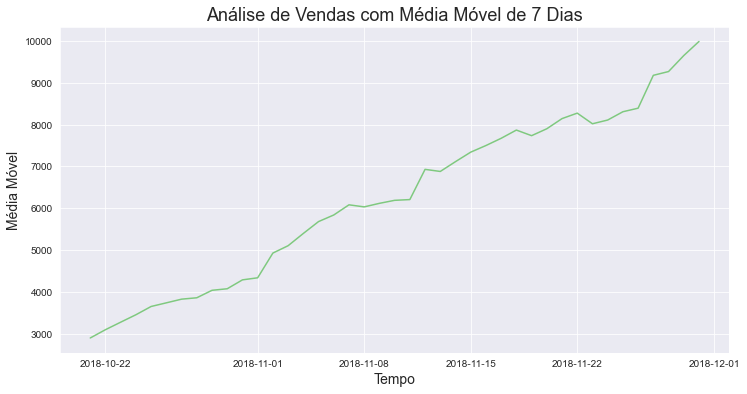

In [133]:
plotar('Análise de Vendas com Média Móvel de 7 Dias','Tempo','Média Móvel','dia','media_movel_21',alucel)

Agora é possível ver de forma mais facilitada a tendência de crescimento das vendas da Alucel. Contudo deve-se ter cuidado com o aumento dos períodos em consideração, pois quanto maior o período em consideração, maior será a quantidade de dados antigos que serão usados na análise. Se forem usados dados muito antigos eles podem mostrar comportamentos que não são mais verdadeiros.

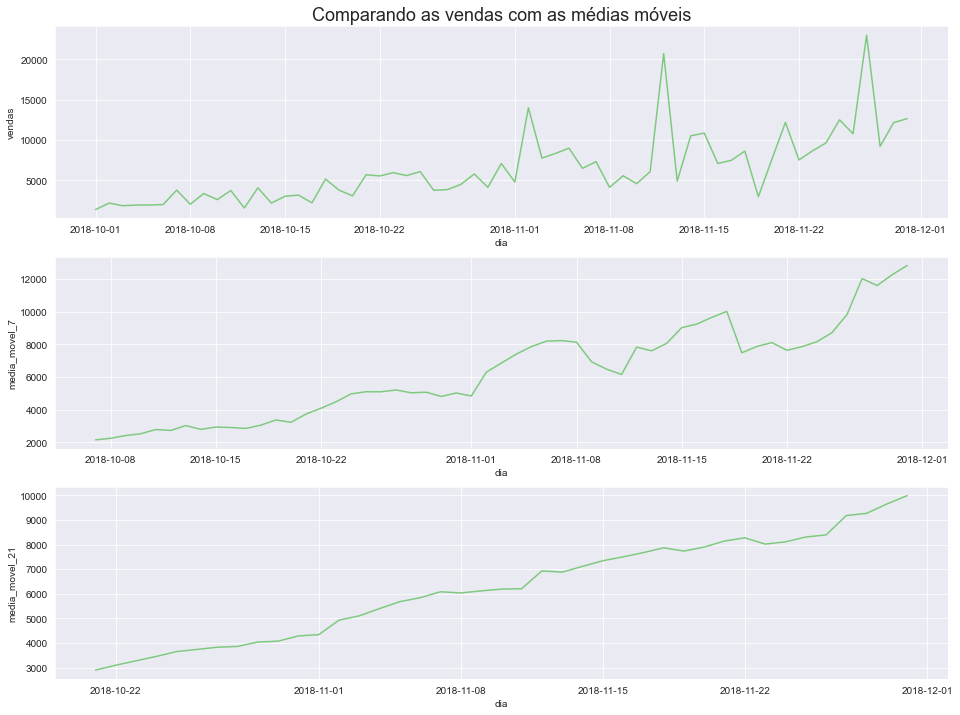

In [135]:
plot_comparacao('dia', 'vendas', 'media_movel_7', 'media_movel_21', alucel, 'Comparando as vendas com as médias móveis')